In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import listdir
import csv

In [2]:
# -------- range of the variables ----------
V_S = 7.0                   # service speed [kn]
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

# Define the lower and upper bounds for each variable
lower_bounds = [range_D[0], range_AEdAO[0], range_PdD[0]]
upper_bounds = [range_D[1], range_AEdAO[1], range_PdD[1]]

# for npop in [5, 10, 20]:
#     for maxit in [20, 30, 40]:

Load files

In [3]:
file_path = '../Main/run/8_0'
solvers = ['cmaes', 'openaies']

In [4]:

solver_names = {'cmaes': 'CMA-ES', 'openaies': 'OpenAI-ES'}
    
col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 'n', 'fitness', 't075dD','tmin075dD', 'tal07R','cavLim', 'Vtip','Vtipmax', 'penalty', 'valid']
def read_csv(file_path, file_name):
    df = pd.read_csv(file_path+'/'+file_name, header=None, skiprows=1, names=col_names)
    return df

df_runs = pd.DataFrame()
df_results = pd.DataFrame()
df_best_run_results = pd.DataFrame()

for run_dir_name in sorted(listdir(file_path)):
    csv_filename = file_path+'/'+run_dir_name+'/configs.csv'
    with open(csv_filename, 'r', newline='\n') as csvfile:
        csv_reader = csv.reader(csvfile)
        V_S    = next(csv_reader)[1]
        NPOP   = next(csv_reader)[1]
        MAX_IT = next(csv_reader)[1]
        SEED   = next(csv_reader)[1]

    for solver in solvers:
        best_run_row_fitness = -float('inf')
        best_run_row_id = 0
        # read file
        temp_path = file_path + '/' + run_dir_name + '/' + solver
        for file_name in listdir(temp_path):
            print(temp_path, file_name)
            df = read_csv(temp_path, file_name)
            # add config csv to table
            df['Algorithm'] = solver_names[solver]
            df['VS'] = float(V_S)
            df['Population size'] = int(NPOP)
            df['Max Generations'] = int(MAX_IT)
            df['SEED'] = int(SEED)
            
            # first csv, df_runs is empty
            if df_runs.empty:
                df_runs = df
            else:
                df_runs = pd.concat([df_runs, df])
                
            # == get the best result ==
            # the best value (saved in the last row)
            D, AEdAO, PdD, Z, fitness = df.iloc[-1][['D', 'AEdAO', 'PdD', 'Z', 'fitness']]
            Z = int(Z)
            # history (the best fitness found at each iteration)
            row = df.loc[(df['D'] == D) & (df['AEdAO'] == AEdAO) & (df['PdD'] == PdD) & (df['n'] == 0)]
            # first csv, df_results is empty
            if df_results.empty:
                df_results = row
            else:
                df_results = pd.concat([df_results, row])
                
            # == compare to best run row ==
            if best_run_row_fitness ==  -float('inf'):
                best_run_row_fitness = row['fitness'].to_numpy()[0]
                best_run_row_id = len(df_results)-1
            else:
                if row['valid'].any():
                    temp_fitness = row['fitness'].to_numpy()[0]
                    if temp_fitness > best_run_row_fitness:
                        best_run_row_fitness = temp_fitness
                        best_run_row_id = len(df_results)-1
                
        # after read all the Z files for that run
        best_run_row = df_results.iloc[[best_run_row_id]]
        if df_best_run_results.empty:
            df_best_run_results = best_run_row
        else:
            df_best_run_results = pd.concat([df_best_run_results, best_run_row])
    

../Main/run/8_0/main_2023_10_18_02_18/cmaes 3.csv
../Main/run/8_0/main_2023_10_18_02_18/cmaes 7.csv
../Main/run/8_0/main_2023_10_18_02_18/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_02_18/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_02_18/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_02_18/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_02_18/openaies 3.csv
../Main/run/8_0/main_2023_10_18_02_18/openaies 7.csv
../Main/run/8_0/main_2023_10_18_02_18/openaies 5.csv
../Main/run/8_0/main_2023_10_18_02_18/openaies 2.csv
../Main/run/8_0/main_2023_10_18_02_18/openaies 6.csv
../Main/run/8_0/main_2023_10_18_02_18/openaies 4.csv
../Main/run/8_0/main_2023_10_18_02_31/cmaes 3.csv
../Main/run/8_0/main_2023_10_18_02_31/cmaes 7.csv
../Main/run/8_0/main_2023_10_18_02_31/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_02_31/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_02_31/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_02_31/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_02_31/openaies 3.csv
../Main/run/8_0/main_2023_10_

../Main/run/8_0/main_2023_10_18_05_53/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_05_53/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_05_53/openaies 3.csv
../Main/run/8_0/main_2023_10_18_05_53/openaies 7.csv
../Main/run/8_0/main_2023_10_18_05_53/openaies 5.csv
../Main/run/8_0/main_2023_10_18_05_53/openaies 2.csv
../Main/run/8_0/main_2023_10_18_05_53/openaies 6.csv
../Main/run/8_0/main_2023_10_18_05_53/openaies 4.csv
../Main/run/8_0/main_2023_10_18_06_14/cmaes 3.csv
../Main/run/8_0/main_2023_10_18_06_14/cmaes 7.csv
../Main/run/8_0/main_2023_10_18_06_14/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_06_14/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_06_14/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_06_14/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_06_14/openaies 3.csv
../Main/run/8_0/main_2023_10_18_06_14/openaies 7.csv
../Main/run/8_0/main_2023_10_18_06_14/openaies 5.csv
../Main/run/8_0/main_2023_10_18_06_14/openaies 2.csv
../Main/run/8_0/main_2023_10_18_06_14/openaies 6.csv
../Main/run/8_0/m

../Main/run/8_0/main_2023_10_18_11_16/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_11_16/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_11_16/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_11_16/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_11_16/openaies 3.csv
../Main/run/8_0/main_2023_10_18_11_16/openaies 7.csv
../Main/run/8_0/main_2023_10_18_11_16/openaies 5.csv
../Main/run/8_0/main_2023_10_18_11_16/openaies 2.csv
../Main/run/8_0/main_2023_10_18_11_16/openaies 6.csv
../Main/run/8_0/main_2023_10_18_11_16/openaies 4.csv
../Main/run/8_0/main_2023_10_18_11_41/cmaes 3.csv
../Main/run/8_0/main_2023_10_18_11_41/cmaes 7.csv
../Main/run/8_0/main_2023_10_18_11_41/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_11_41/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_11_41/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_11_41/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_11_41/openaies 3.csv
../Main/run/8_0/main_2023_10_18_11_41/openaies 7.csv
../Main/run/8_0/main_2023_10_18_11_41/openaies 5.csv
../Main/run/8_0/main_20

../Main/run/8_0/main_2023_10_18_15_39/openaies 4.csv
../Main/run/8_0/main_2023_10_18_16_05/cmaes 3.csv
../Main/run/8_0/main_2023_10_18_16_05/cmaes 7.csv
../Main/run/8_0/main_2023_10_18_16_05/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_16_05/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_16_05/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_16_05/cmaes 4.csv
../Main/run/8_0/main_2023_10_18_16_05/openaies 3.csv
../Main/run/8_0/main_2023_10_18_16_05/openaies 7.csv
../Main/run/8_0/main_2023_10_18_16_05/openaies 5.csv
../Main/run/8_0/main_2023_10_18_16_05/openaies 2.csv
../Main/run/8_0/main_2023_10_18_16_05/openaies 6.csv
../Main/run/8_0/main_2023_10_18_16_05/openaies 4.csv
../Main/run/8_0/main_2023_10_18_16_33/cmaes 3.csv
../Main/run/8_0/main_2023_10_18_16_33/cmaes 7.csv
../Main/run/8_0/main_2023_10_18_16_33/cmaes 5.csv
../Main/run/8_0/main_2023_10_18_16_33/cmaes 2.csv
../Main/run/8_0/main_2023_10_18_16_33/cmaes 6.csv
../Main/run/8_0/main_2023_10_18_16_33/cmaes 4.csv
../Main/run/8_0/main_2023_10_

../Main/run/8_0/main_2023_10_18_23_26/openaies 7.csv
../Main/run/8_0/main_2023_10_18_23_26/openaies 5.csv
../Main/run/8_0/main_2023_10_18_23_26/openaies 2.csv
../Main/run/8_0/main_2023_10_18_23_26/openaies 6.csv
../Main/run/8_0/main_2023_10_18_23_26/openaies 4.csv
../Main/run/8_0/main_2023_10_19_00_02/cmaes 3.csv
../Main/run/8_0/main_2023_10_19_00_02/cmaes 7.csv
../Main/run/8_0/main_2023_10_19_00_02/cmaes 5.csv
../Main/run/8_0/main_2023_10_19_00_02/cmaes 2.csv
../Main/run/8_0/main_2023_10_19_00_02/cmaes 6.csv
../Main/run/8_0/main_2023_10_19_00_02/cmaes 4.csv
../Main/run/8_0/main_2023_10_19_00_02/openaies 3.csv
../Main/run/8_0/main_2023_10_19_00_02/openaies 7.csv
../Main/run/8_0/main_2023_10_19_00_02/openaies 5.csv
../Main/run/8_0/main_2023_10_19_00_02/openaies 2.csv
../Main/run/8_0/main_2023_10_19_00_02/openaies 6.csv
../Main/run/8_0/main_2023_10_19_00_02/openaies 4.csv
../Main/run/8_0/main_2023_10_19_00_40/cmaes 3.csv
../Main/run/8_0/main_2023_10_19_00_40/cmaes 7.csv
../Main/run/8_0/m

../Main/run/8_0/main_2023_10_19_08_14/cmaes 3.csv
../Main/run/8_0/main_2023_10_19_08_14/cmaes 7.csv
../Main/run/8_0/main_2023_10_19_08_14/cmaes 5.csv
../Main/run/8_0/main_2023_10_19_08_14/cmaes 2.csv
../Main/run/8_0/main_2023_10_19_08_14/cmaes 6.csv
../Main/run/8_0/main_2023_10_19_08_14/cmaes 4.csv
../Main/run/8_0/main_2023_10_19_08_14/openaies 3.csv
../Main/run/8_0/main_2023_10_19_08_14/openaies 7.csv
../Main/run/8_0/main_2023_10_19_08_14/openaies 5.csv
../Main/run/8_0/main_2023_10_19_08_14/openaies 2.csv
../Main/run/8_0/main_2023_10_19_08_14/openaies 6.csv
../Main/run/8_0/main_2023_10_19_08_14/openaies 4.csv
../Main/run/8_0/main_2023_10_19_09_05/cmaes 3.csv
../Main/run/8_0/main_2023_10_19_09_05/cmaes 7.csv
../Main/run/8_0/main_2023_10_19_09_05/cmaes 5.csv
../Main/run/8_0/main_2023_10_19_09_05/cmaes 2.csv
../Main/run/8_0/main_2023_10_19_09_05/cmaes 6.csv
../Main/run/8_0/main_2023_10_19_09_05/cmaes 4.csv
../Main/run/8_0/main_2023_10_19_09_05/openaies 3.csv
../Main/run/8_0/main_2023_10_

../Main/run/8_0/main_2023_10_19_21_00/cmaes 2.csv
../Main/run/8_0/main_2023_10_19_21_00/cmaes 6.csv
../Main/run/8_0/main_2023_10_19_21_00/cmaes 4.csv
../Main/run/8_0/main_2023_10_19_21_00/openaies 3.csv
../Main/run/8_0/main_2023_10_19_21_00/openaies 7.csv
../Main/run/8_0/main_2023_10_19_21_00/openaies 5.csv
../Main/run/8_0/main_2023_10_19_21_00/openaies 2.csv
../Main/run/8_0/main_2023_10_19_21_00/openaies 6.csv
../Main/run/8_0/main_2023_10_19_21_00/openaies 4.csv
../Main/run/8_0/main_2023_10_19_22_04/cmaes 3.csv
../Main/run/8_0/main_2023_10_19_22_04/cmaes 7.csv
../Main/run/8_0/main_2023_10_19_22_04/cmaes 5.csv
../Main/run/8_0/main_2023_10_19_22_04/cmaes 2.csv
../Main/run/8_0/main_2023_10_19_22_04/cmaes 6.csv
../Main/run/8_0/main_2023_10_19_22_04/cmaes 4.csv
../Main/run/8_0/main_2023_10_19_22_04/openaies 3.csv
../Main/run/8_0/main_2023_10_19_22_04/openaies 7.csv
../Main/run/8_0/main_2023_10_19_22_04/openaies 5.csv
../Main/run/8_0/main_2023_10_19_22_04/openaies 2.csv
../Main/run/8_0/main

In [5]:
df_runs

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
0,0.796687269726366,0.691748,0.754962,3.0,143.663587,0.0,-173.306897,0.01475,0.011857,0.189825,0.157356,34.383885,39.0,0.206338,False,CMA-ES,8.0,5,20,0
1,0.7998753267443718,0.739333,0.920475,3.0,149.769822,0.0,-193.356980,0.01475,0.012005,0.242384,0.187745,29.878938,39.0,0.291028,False,CMA-ES,8.0,5,20,0
2,0.7442008439759686,0.864655,0.990182,3.0,161.300523,0.0,-210.795127,0.01475,0.012508,0.245858,0.188130,29.830309,39.0,0.306847,False,CMA-ES,8.0,5,20,0
3,0.6285710173341629,0.849604,0.770005,3.0,178.431981,0.0,-274.800435,0.01475,0.013478,0.177709,0.119546,41.088745,39.0,0.540085,False,CMA-ES,8.0,5,20,0
4,0.5867136234554181,0.691639,0.822660,3.0,190.544294,0.0,-419.393287,0.01475,0.013975,0.242275,0.114270,42.152265,39.0,1.201028,False,CMA-ES,8.0,5,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,0.8,1.050000,0.883440,4.0,143.030128,0.0,-143.030128,0.01350,0.011128,0.169993,0.188447,29.784361,39.0,0.000000,True,OpenAI-ES,8.0,20,40,9
838,0.8,1.050000,0.761763,4.0,142.260676,0.0,-142.260676,0.01350,0.011058,0.132362,0.164385,33.290745,39.0,0.000000,True,OpenAI-ES,8.0,20,40,9
839,fitness at iteration,39.000000,NaN,NaN,NaN,NaN,-138.507656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OpenAI-ES,8.0,20,40,9
840,Best Solution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OpenAI-ES,8.0,20,40,9


In [6]:
# all the results for all the Z and algorithms runs
df_results

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
114,0.7999955006930459,0.786002,0.686345,3.0,144.049065,0.0,-144.049065,0.01475,0.011794,0.143928,0.144001,36.599470,39.0,0.0,True,CMA-ES,8.0,5,20,0
105,0.7997766948548926,0.860842,0.740730,7.0,137.937763,0.0,-137.937763,0.00975,0.009692,0.170750,0.171404,32.276522,39.0,0.0,True,CMA-ES,8.0,5,20,0
111,0.7998441640407729,0.813324,0.683667,5.0,135.819113,0.0,-135.819113,0.01225,0.010348,0.150416,0.152612,35.169997,39.0,0.0,True,CMA-ES,8.0,5,20,0
118,0.799854878566675,1.049229,1.010995,2.0,151.412475,0.0,-151.412475,0.01600,0.013410,0.207412,0.207476,27.395745,39.0,0.0,True,CMA-ES,8.0,5,20,0
106,0.7999766556627601,0.823223,0.701295,6.0,135.642449,0.0,-135.642449,0.01100,0.009954,0.159718,0.159914,33.976434,39.0,0.0,True,CMA-ES,8.0,5,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.8,0.878456,0.716438,7.0,138.249941,0.0,-138.249941,0.00975,0.009680,0.158649,0.166014,33.049028,39.0,0.0,True,OpenAI-ES,8.0,20,40,9
25,0.8,0.783644,0.636971,5.0,135.834406,0.0,-135.834406,0.01225,0.010301,0.140140,0.142139,36.922061,39.0,0.0,True,OpenAI-ES,8.0,20,40,9
681,0.8,1.050000,1.011329,2.0,151.351174,0.0,-151.351174,0.01600,0.013408,0.207394,0.207590,27.382661,39.0,0.0,True,OpenAI-ES,8.0,20,40,9
25,0.8,0.783644,0.636971,6.0,135.901376,0.0,-135.901376,0.01100,0.009902,0.145000,0.145827,36.289451,39.0,0.0,True,OpenAI-ES,8.0,20,40,9


In [7]:
# best result of each run (best from the different Z, but same algorithm)
df_best_run_results

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
106,0.7999766556627601,0.823223,0.701295,6.0,135.642449,0.0,-135.642449,0.01100,0.009954,0.159718,0.159914,33.976434,39.0,0.0,True,CMA-ES,8.0,5,20,0
30,0.8,1.050000,0.756204,6.0,139.614356,0.0,-139.614356,0.01100,0.010043,0.139096,0.170251,32.437575,39.0,0.0,True,OpenAI-ES,8.0,5,20,0
27,0.7973296496175489,0.812112,0.689205,5.0,136.121126,0.0,-136.121126,0.01225,0.010368,0.152787,0.153269,35.058519,39.0,0.0,True,CMA-ES,8.0,5,20,1
102,0.8,1.050000,0.755821,6.0,139.615049,0.0,-139.615049,0.01100,0.010043,0.138980,0.170164,32.449804,39.0,0.0,True,OpenAI-ES,8.0,5,20,1
84,0.7999983164531025,0.789907,0.663591,5.0,135.586361,0.0,-135.586361,0.01225,0.010325,0.148078,0.148291,35.880972,39.0,0.0,True,CMA-ES,8.0,5,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.8,0.814105,0.663203,6.0,135.815105,0.0,-135.815105,0.01100,0.009925,0.148172,0.151724,35.322743,39.0,0.0,True,OpenAI-ES,8.0,20,40,7
802,0.7999975575238232,0.805772,0.677834,6.0,135.569417,0.0,-135.569417,0.01100,0.009935,0.154963,0.154970,34.773939,39.0,0.0,True,CMA-ES,8.0,20,40,8
420,0.8,1.050000,0.749214,6.0,139.610785,0.0,-139.610785,0.01100,0.010038,0.136984,0.168674,32.661382,39.0,0.0,True,OpenAI-ES,8.0,20,40,8
742,0.7999999650930043,0.807556,0.680276,6.0,135.568539,0.0,-135.568539,0.01100,0.009937,0.155466,0.155489,34.688583,39.0,0.0,True,CMA-ES,8.0,20,40,9


In [8]:
# the best results that the run didnt find some valid result
df_best_run_results[df_best_run_results['valid']  == False]

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
33,0.8,0.880905,0.570096,3.0,152.274521,0.0,-165.550766,0.01475,0.011734,0.09329,0.113049,42.400264,39.0,0.087186,False,OpenAI-ES,8.0,20,20,8


In [9]:
# filter to only the valid results
df_best_run_results = df_best_run_results[df_best_run_results['valid'] == True]
df_best_run_results

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
106,0.7999766556627601,0.823223,0.701295,6.0,135.642449,0.0,-135.642449,0.01100,0.009954,0.159718,0.159914,33.976434,39.0,0.0,True,CMA-ES,8.0,5,20,0
30,0.8,1.050000,0.756204,6.0,139.614356,0.0,-139.614356,0.01100,0.010043,0.139096,0.170251,32.437575,39.0,0.0,True,OpenAI-ES,8.0,5,20,0
27,0.7973296496175489,0.812112,0.689205,5.0,136.121126,0.0,-136.121126,0.01225,0.010368,0.152787,0.153269,35.058519,39.0,0.0,True,CMA-ES,8.0,5,20,1
102,0.8,1.050000,0.755821,6.0,139.615049,0.0,-139.615049,0.01100,0.010043,0.138980,0.170164,32.449804,39.0,0.0,True,OpenAI-ES,8.0,5,20,1
84,0.7999983164531025,0.789907,0.663591,5.0,135.586361,0.0,-135.586361,0.01225,0.010325,0.148078,0.148291,35.880972,39.0,0.0,True,CMA-ES,8.0,5,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.8,0.814105,0.663203,6.0,135.815105,0.0,-135.815105,0.01100,0.009925,0.148172,0.151724,35.322743,39.0,0.0,True,OpenAI-ES,8.0,20,40,7
802,0.7999975575238232,0.805772,0.677834,6.0,135.569417,0.0,-135.569417,0.01100,0.009935,0.154963,0.154970,34.773939,39.0,0.0,True,CMA-ES,8.0,20,40,8
420,0.8,1.050000,0.749214,6.0,139.610785,0.0,-139.610785,0.01100,0.010038,0.136984,0.168674,32.661382,39.0,0.0,True,OpenAI-ES,8.0,20,40,8
742,0.7999999650930043,0.807556,0.680276,6.0,135.568539,0.0,-135.568539,0.01100,0.009937,0.155466,0.155489,34.688583,39.0,0.0,True,CMA-ES,8.0,20,40,9


# Create imgs

In [15]:
# save file
save_img = True

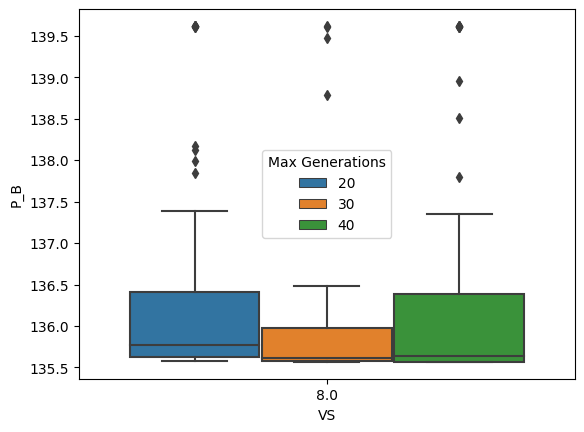

In [10]:
default_palette = sns.color_palette()
# Box plot
sns.boxplot(y="P_B",
            x = "VS",
            hue = 'Max Generations',
            palette=default_palette,
            data = df_best_run_results
           )

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,9)})

# sns.despine(offset=0, trim=True)


CMA-ES

In [11]:
# filter to only CMAES
df_best_run_results_cmaes = df_best_run_results[df_best_run_results['Algorithm'] == 'CMA-ES']
df_best_run_results_cmaes

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
106,0.7999766556627601,0.823223,0.701295,6.0,135.642449,0.0,-135.642449,0.01100,0.009954,0.159718,0.159914,33.976434,39.0,0.0,True,CMA-ES,8.0,5,20,0
27,0.7973296496175489,0.812112,0.689205,5.0,136.121126,0.0,-136.121126,0.01225,0.010368,0.152787,0.153269,35.058519,39.0,0.0,True,CMA-ES,8.0,5,20,1
84,0.7999983164531025,0.789907,0.663591,5.0,135.586361,0.0,-135.586361,0.01225,0.010325,0.148078,0.148291,35.880972,39.0,0.0,True,CMA-ES,8.0,5,20,2
90,0.7989070113272837,0.818816,0.689294,6.0,135.777132,0.0,-135.777132,0.01100,0.009951,0.156475,0.157125,34.421314,39.0,0.0,True,CMA-ES,8.0,5,20,3
102,0.7995102818870605,0.834055,0.706563,6.0,135.805295,0.0,-135.805295,0.01100,0.009962,0.159445,0.160892,33.824376,39.0,0.0,True,CMA-ES,8.0,5,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.7999970045400346,0.810082,0.684035,6.0,135.568374,0.0,-135.568374,0.01100,0.009940,0.156284,0.156288,34.558155,39.0,0.0,True,CMA-ES,8.0,20,40,5
712,0.7999999985502124,0.808326,0.681513,6.0,135.567174,0.0,-135.567174,0.01100,0.009938,0.155747,0.155752,34.645424,39.0,0.0,True,CMA-ES,8.0,20,40,6
814,0.7999999460345552,0.808961,0.682354,6.0,135.567791,0.0,-135.567791,0.01100,0.009938,0.155916,0.155931,34.616288,39.0,0.0,True,CMA-ES,8.0,20,40,7
802,0.7999975575238232,0.805772,0.677834,6.0,135.569417,0.0,-135.569417,0.01100,0.009935,0.154963,0.154970,34.773939,39.0,0.0,True,CMA-ES,8.0,20,40,8


salvo


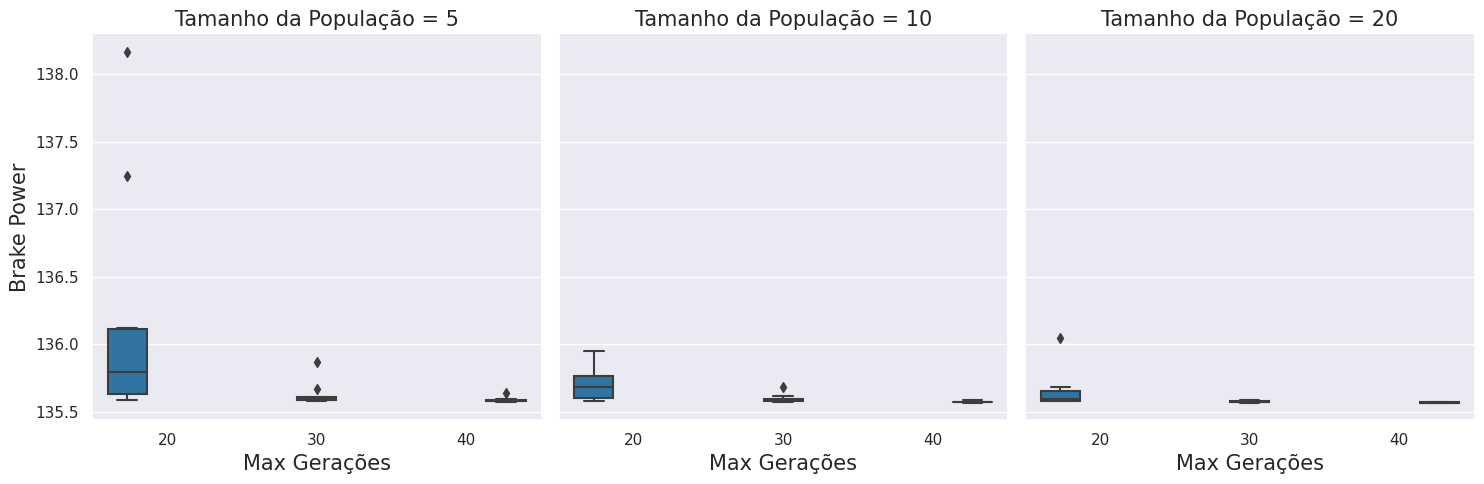

In [14]:
# Seaborn plot
g = sns.catplot(x='Max Generations', y='P_B', data=df_best_run_results_cmaes, kind='box',
                palette=default_palette,
                hue='Max Generations',col='Population size', legend=False)

# Set labels and titles
g.set_axis_labels('Max Gerações', 'Brake Power', size=15)
g.set_titles(col_template='Tamanho da População = {col_name}', size=15)

if save_img:
    plt.tight_layout()
    plt.savefig("pop_gen_cmaes.pdf", dpi=300)
    print('salvo')
# Show the plot
plt.show()

OpenAI-ES

In [17]:
# filter to only OpenAI-ES
df_best_run_results_openaies = df_best_run_results[df_best_run_results['Algorithm'] == 'OpenAI-ES']
df_best_run_results_openaies

,D,AEdAO,PdD,Z,P_B,n,fitness,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax,penalty,valid,Algorithm,VS,Population size,Max Generations,SEED
30,0.8,1.050000,0.756204,6.0,139.614356,0.0,-139.614356,0.01100,0.010043,0.139096,0.170251,32.437575,39.0,0.0,True,OpenAI-ES,8.0,5,20,0
102,0.8,1.050000,0.755821,6.0,139.615049,0.0,-139.615049,0.01100,0.010043,0.138980,0.170164,32.449804,39.0,0.0,True,OpenAI-ES,8.0,5,20,1
16,0.8,0.903495,0.783714,6.0,136.987023,0.0,-136.987023,0.01100,0.010022,0.172581,0.176490,31.488193,39.0,0.0,True,OpenAI-ES,8.0,5,20,2
28,0.8,0.861084,0.715320,6.0,136.076338,0.0,-136.076338,0.01100,0.009970,0.157160,0.162725,33.541965,39.0,0.0,True,OpenAI-ES,8.0,5,20,3
48,0.8,0.962997,0.767932,6.0,137.843142,0.0,-137.843142,0.01100,0.010027,0.156420,0.173277,31.980661,39.0,0.0,True,OpenAI-ES,8.0,5,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.8,1.050000,0.749873,6.0,139.609261,0.0,-139.609261,0.01100,0.010039,0.137183,0.168823,32.639988,39.0,0.0,True,OpenAI-ES,8.0,20,20,5
447,0.8,1.050000,0.748899,6.0,139.609981,0.0,-139.609981,0.01100,0.010038,0.136889,0.168603,32.671526,39.0,0.0,True,OpenAI-ES,8.0,20,20,6
131,0.8,0.814105,0.663203,6.0,135.815105,0.0,-135.815105,0.01100,0.009925,0.148172,0.151724,35.322743,39.0,0.0,True,OpenAI-ES,8.0,20,20,7
420,0.8,1.050000,0.749214,6.0,139.610785,0.0,-139.610785,0.01100,0.010038,0.136984,0.168674,32.661382,39.0,0.0,True,OpenAI-ES,8.0,20,20,8


/tmp/ipykernel_37926/3859505068.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.catplot(x='Max Generations', y='P_B', data=df_best_run_results_openaies, kind='box',


salvo


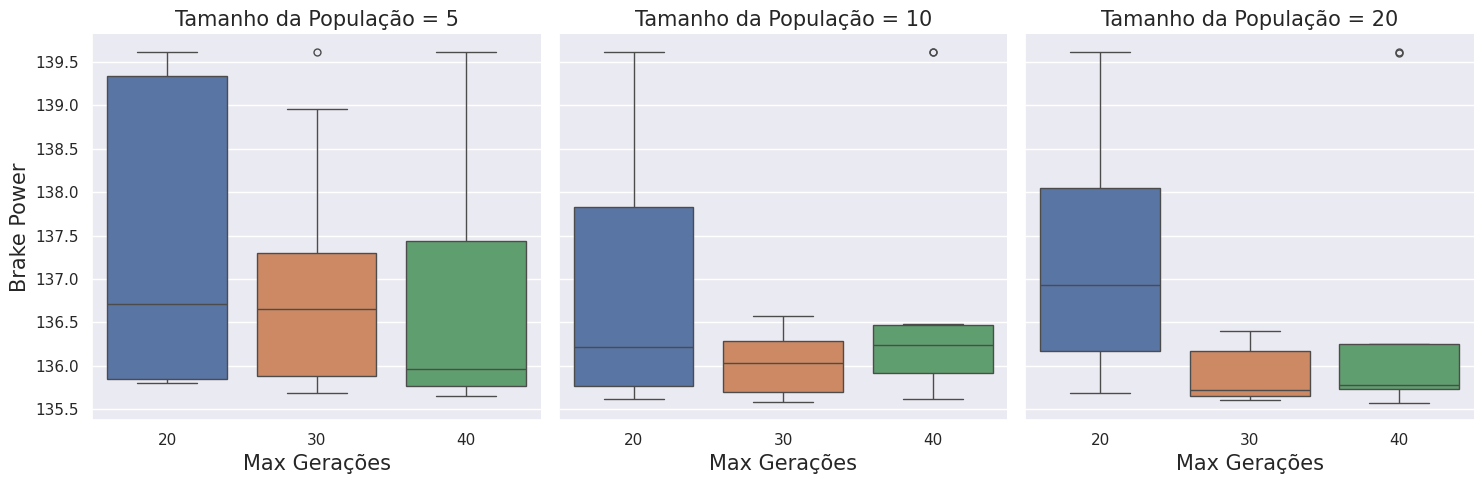

In [22]:
default_palette = sns.color_palette()

# Seaborn plot
g = sns.catplot(x='Max Generations', y='P_B', data=df_best_run_results_openaies, kind='box',
                palette=default_palette,
                hue='Max Generations',col='Population size', legend=False)

# Set labels and titles
g.set_axis_labels('Max Gerações', 'Brake Power', size=15)
g.set_titles(col_template='Tamanho da População = {col_name}', size=15)

if save_img:
    plt.tight_layout()
    plt.savefig("pop_gen_openaies.pdf", dpi=300)
    print('salvo')
# Show the plot
plt.show()